In [13]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


def get_json(data_file):
    with open(data_file) as data_file:
        data = json.load(data_file)

    dict1 = [{
        'name': str(x['updatedRm']['index']) + '-' + str(x['updatedRm']['name']),
        'totalError': x['totalError'],
        'hf': x['hf'],
        'refHf': x['updatedRm']['datum'][0],
        'ie': x['ie'],
        'refIe': x['updatedRm']['datum'][2],
        'dipole': x['dipole'],
        'refDipole': x['updatedRm']['datum'][1],
        'geomError': x['geomGradMag'],
        'hasGeom': 'expGeom' in x['updatedRm']
    } for x in data['results']]

    return pd.DataFrame(dict1);


dfs = [get_json(x) for x in ['../../archivesfixed/abhlla/outputs/0009-C3U3RNBEO0-1BC5GM2ATC.json',
                             '../../archivesfixed/abhlla/outputs/0057-30384HXIB6-H81IJLA0YM.json',
                             '../../archivesfixed/abhlla/outputs/0057-30384HXIB6-H81IJLA0YM.json',
                             '../../archivesfixed/abhlla/outputs/0057-30384HXIB6-H81IJLA0YM.json']]

In [14]:
datanames = ["original", "gradient", "qa", "rfo"]

for i in range(len(dfs)):
    df = dfs[i]
    df["hfError"] = df["hf"] - df["refHf"]
    df["refIe"] = df["refIe"][df["refIe"] != 0]
    df["ieError"] = df["ie"] - df["refIe"]
    df["refDipole"] = df["refDipole"][df["refDipole"] != 0]
    df["dipoleError"] = df["dipole"] - df["refDipole"]
    df["geomError"] = df["geomError"][df["hasGeom"] == True]
    df["optMethod"] = datanames[i]

dfs[0].drop('hasGeom', 1).drop('optMethod', 1).to_csv('run0.csv')

C:\Users\billi\AppData\Local\Temp\ipykernel_23228\686081006.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dfs[0].drop('hasGeom', 1).drop('optMethod', 1).to_csv('run0.csv')
C:\Users\billi\AppData\Local\Temp\ipykernel_23228\686081006.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dfs[0].drop('hasGeom', 1).drop('optMethod', 1).to_csv('run0.csv')


In [15]:
f = 0.9
outliers = dfs[3][dfs[3].totalError > dfs[3].totalError.quantile(f)]
wellbehaving = dfs[3][dfs[3].totalError < dfs[3].totalError.quantile(f)]
orig_outliers = dfs[0][dfs[0].totalError > dfs[0].totalError.quantile(f)]
orig_wb = dfs[0][dfs[0].totalError < dfs[0].totalError.quantile(f)]

osorted = outliers.sort_values(by='totalError', ascending=False)
osorted.to_csv('outliers.csv')
osorted

,name,totalError,hf,refHf,ie,refIe,dipole,refDipole,geomError,hasGeom,hfError,ieError,dipoleError,optMethod
1168,1168-C2N1F3,10300.644546,-125.154101,-118.4,13.586661,NaN,8.747730e-01,1.26,142.798226,True,-6.754101,NaN,-0.385227,rfo
271,271-H38C18,7209.413357,25.008264,-59.9,11.362616,NaN,3.338297e-02,NaN,NaN,False,84.908264,NaN,NaN,rfo
20,20-H3C3,5301.539695,268.135788,257.0,18.769016,NaN,1.382088e-07,NaN,101.759854,True,11.135788,NaN,NaN,rfo
239,239-H30C14,5216.629417,12.826238,-59.4,11.260494,NaN,3.225527e-04,NaN,NaN,False,72.226238,NaN,NaN,rfo
3,3-C1,4419.116429,364.123565,430.6,18.571112,NaN,0.000000e+00,NaN,NaN,False,-66.476435,NaN,NaN,rfo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,21-H3C3,705.528387,258.310718,281.0,17.103327,NaN,5.978307e-01,NaN,19.530739,True,-22.689282,NaN,NaN,rfo
532,532-H6C4O1,703.266348,-29.724081,-17.3,9.276097,NaN,8.322513e-01,NaN,33.133323,True,-12.424081,NaN,NaN,rfo
1116,1116-H1F1,700.201978,-70.381123,-65.1,14.937875,16.06,1.737082e+00,1.83,32.952747,True,-5.281123,-1.122125,-0.092918,rfo
748,748-H8C5O2,690.720246,-96.431038,-91.9,10.926007,9.15,2.746740e+00,NaN,26.637190,True,-4.531038,1.776007,NaN,rfo


C:\Users\billi\AppData\Local\Temp\ipykernel_23228\1811852659.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tgt = dfs[0].append(dfs[3], ignore_index=True);


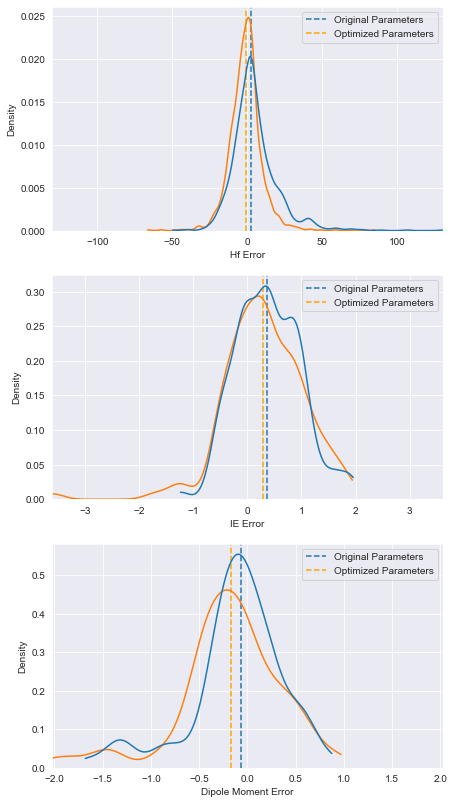

In [16]:
fig, axs = plt.subplots(3, 1, figsize=(7, 14));
axs = axs.flatten()
tgt = dfs[0].append(dfs[3], ignore_index=True);

errorTypes = ["hfError", "ieError", "dipoleError"]
errorTypesNames = ["Hf Error", "IE Error", "Dipole Moment Error"]
for i, e in enumerate(errorTypes):
    axs[i].axvline(dfs[0][e].median(), linestyle='--')
    axs[i].axvline(dfs[3][e].median(), color='orange', linestyle='--')
    n = max(tgt[e].max(), abs(tgt[e].min()))
    axs[i].set_xlim(-n, n)
    sns.kdeplot(data=tgt, x=e, hue="optMethod", gridsize=500, bw_adjust=0.7, cut=0, ax=axs[i])
    axs[i].legend(labels=['Original Parameters', 'Optimized Parameters'])
    axs[i].set_xlabel(errorTypesNames[i])

plt.savefig('error-dist.png', dpi=600)

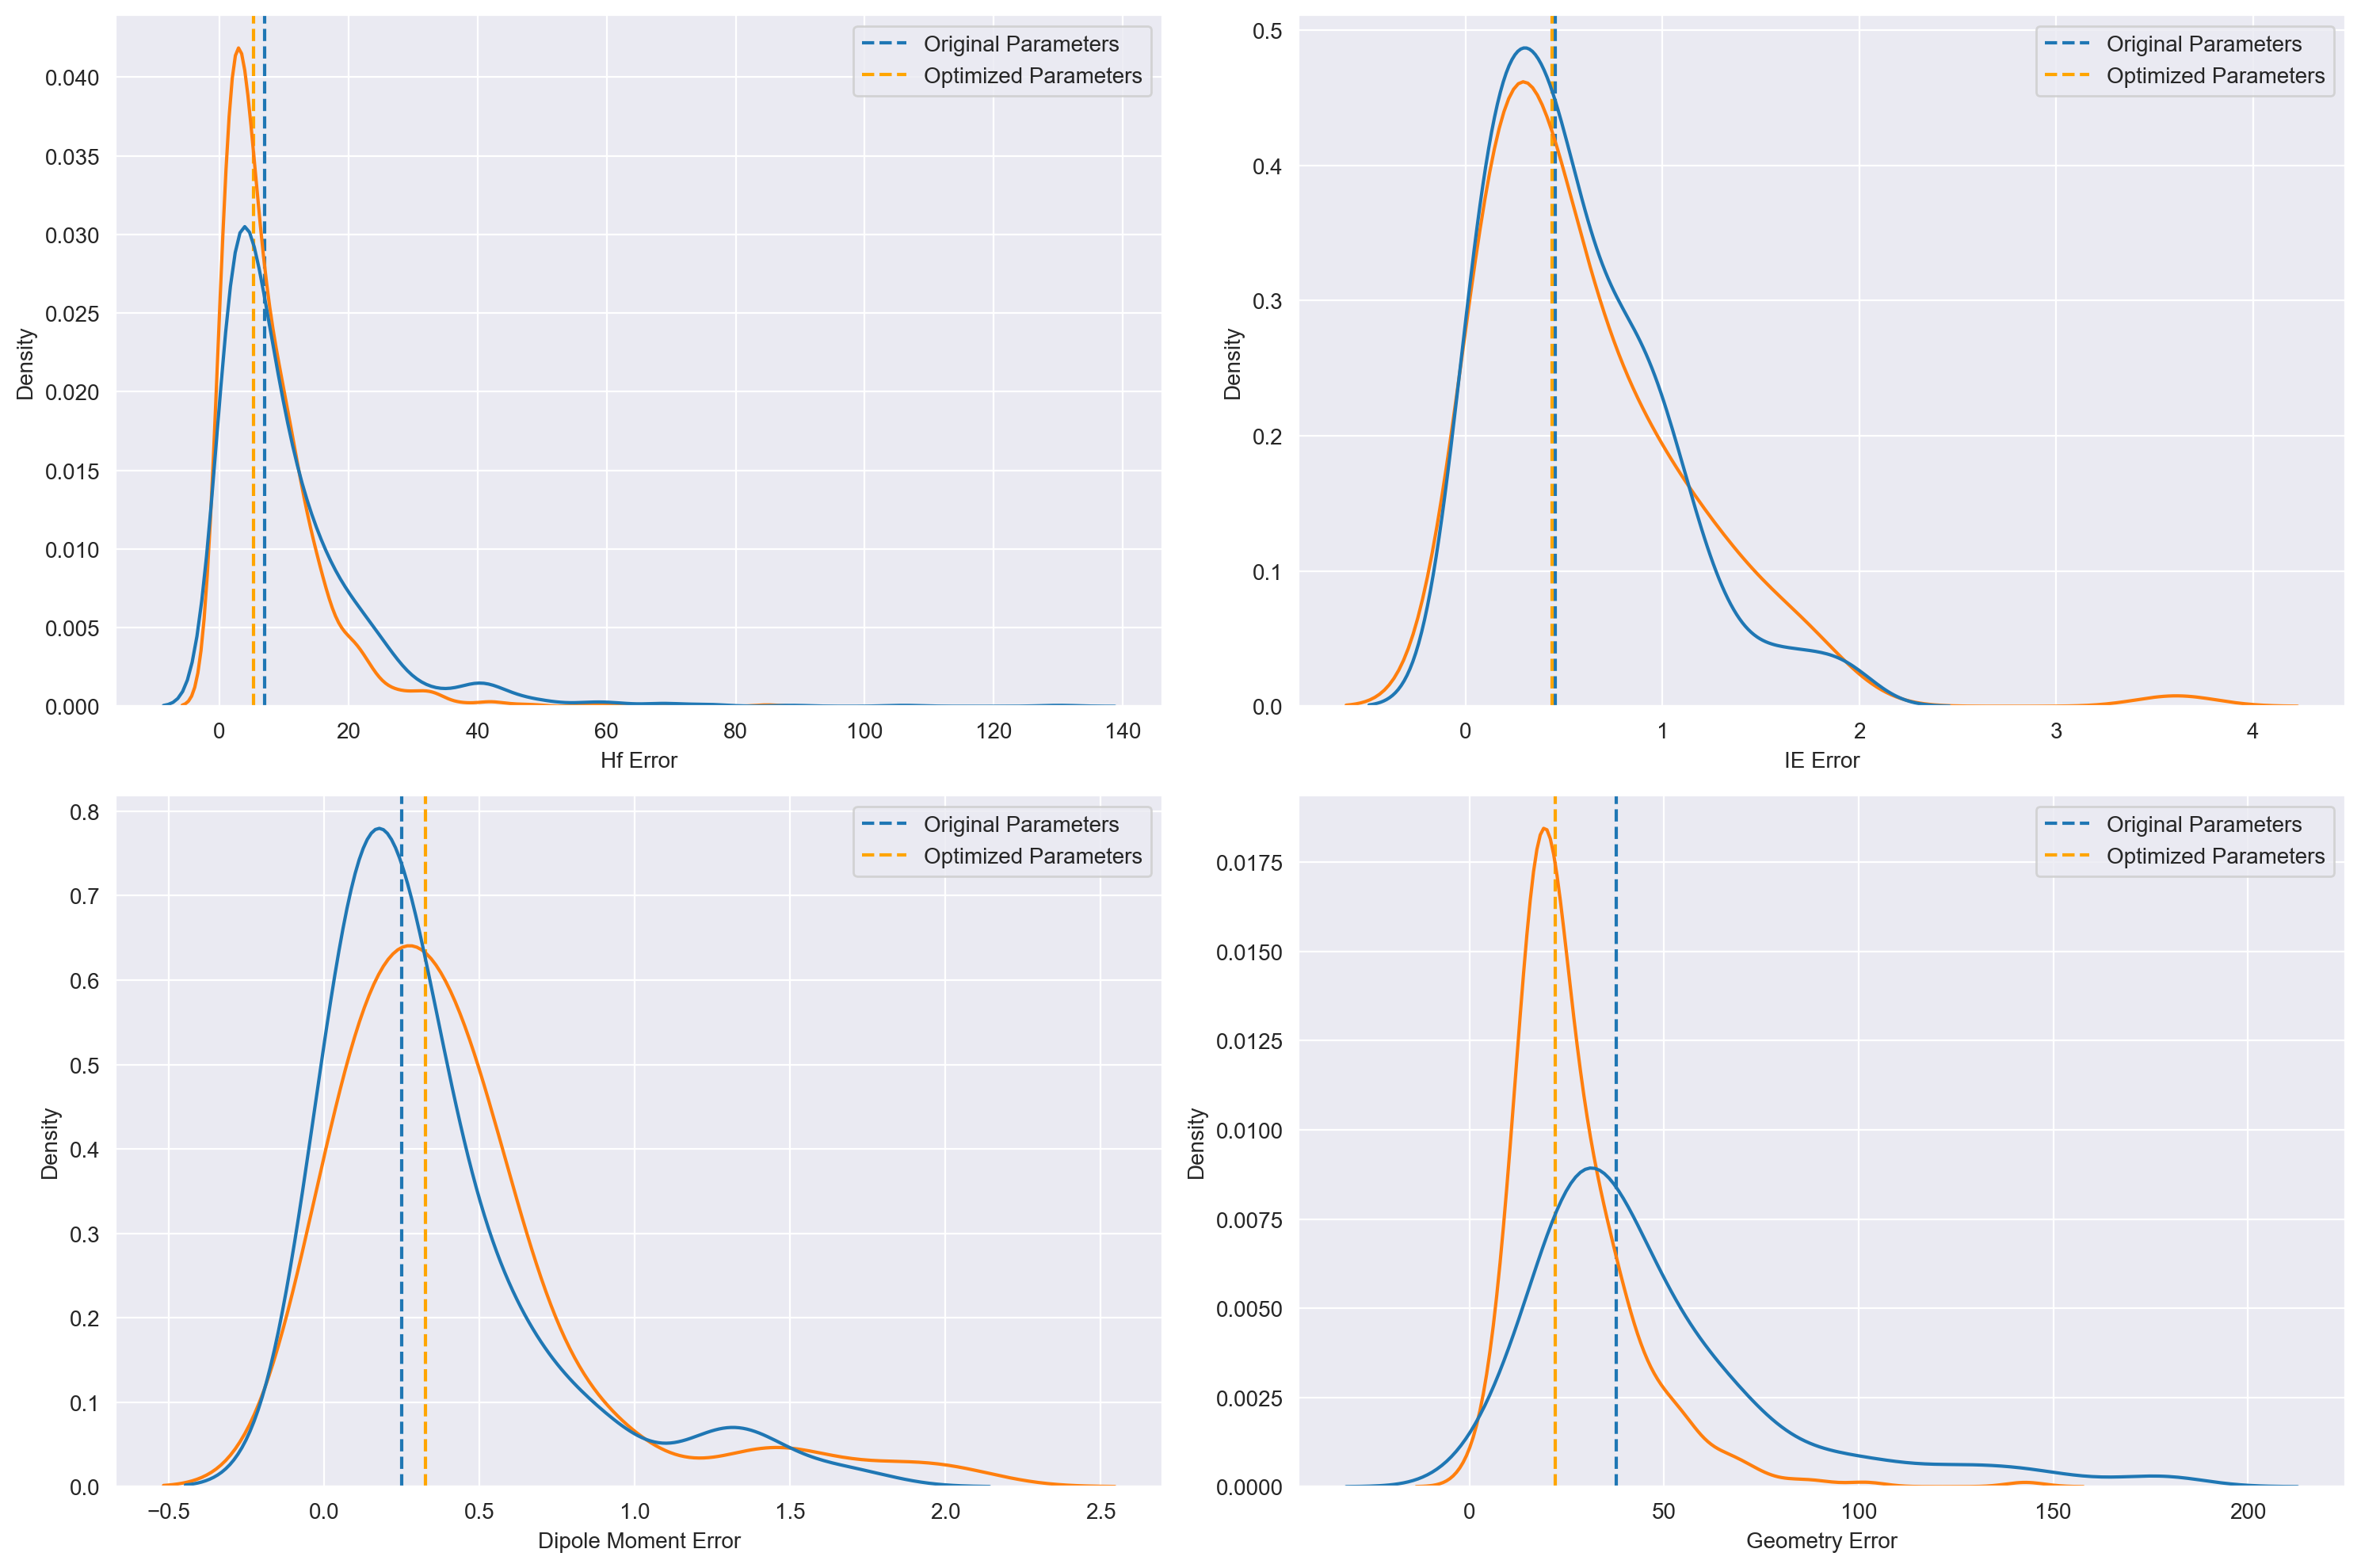

In [85]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10), dpi=200, tight_layout=True)
axs = axs.flatten()

errorTypes = ["hfError", "ieError", "dipoleError", "geomError"]
betterNames2 = ['Hf Error', 'IE Error', 'Dipole Moment Error', 'Geometry Error']
for i, e in enumerate(errorTypes):
    axs[i].axvline(dfs[0][e].abs().median(), linestyle='--')
    axs[i].axvline(dfs[3][e].abs().median(), color='orange', linestyle='--')
    sns.kdeplot(data=tgt, x=tgt[e].abs(), hue="optMethod", ax=axs[i])
    axs[i].set_xlabel(betterNames2[i])
    axs[i].legend(labels=['Original Parameters', 'Optimized Parameters'])

plt.savefig('../styau/error-hist.png')

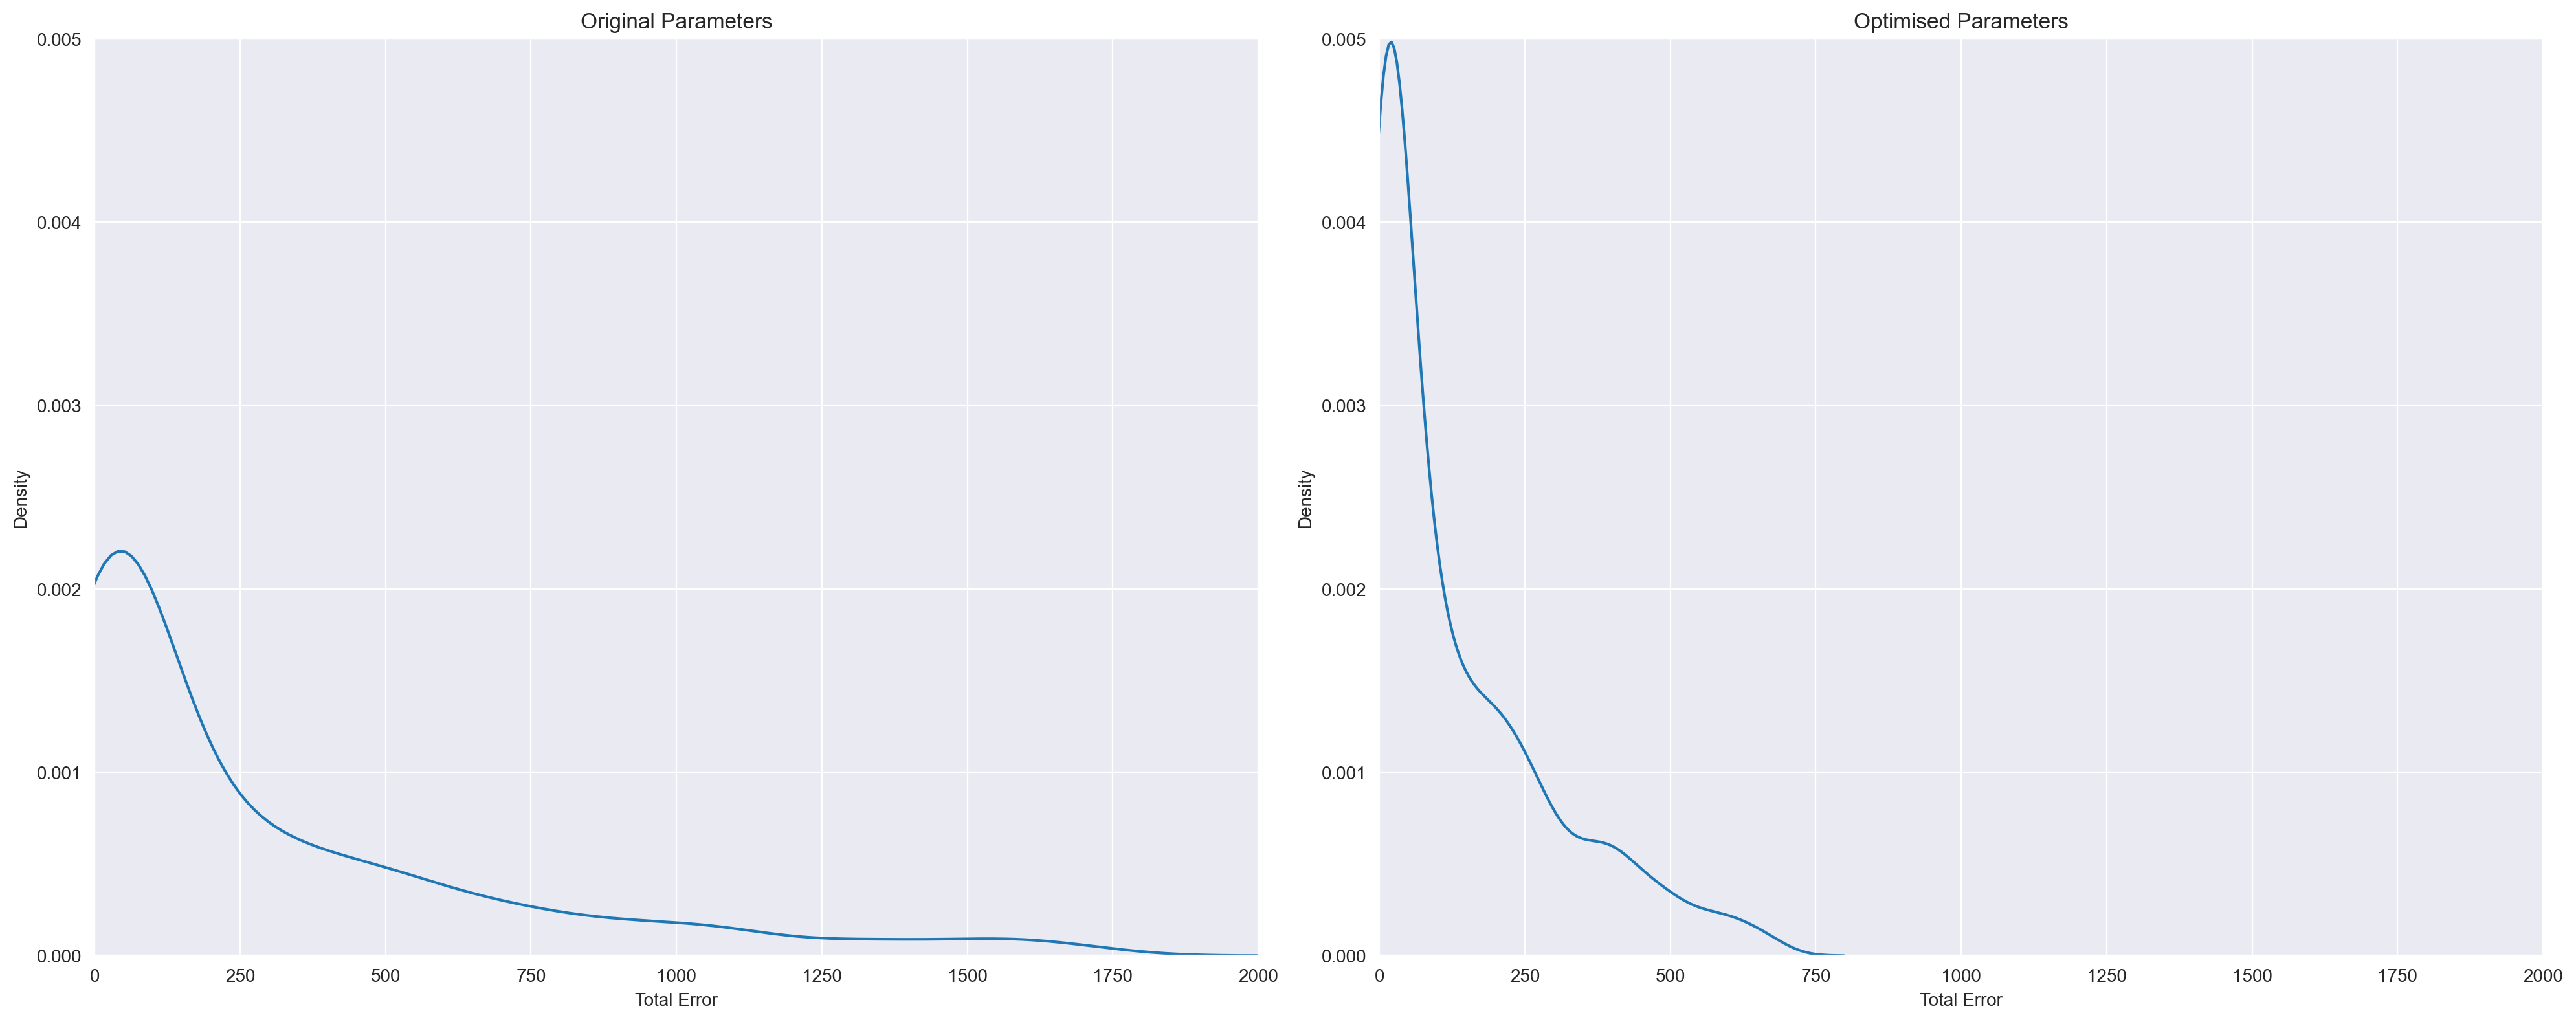

In [81]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8), dpi=200, tight_layout=True)
axs = axs.flatten()

sns.kdeplot(data=orig_wb, x='totalError', ax=axs[0])
axs[0].set(title='Original Parameters', xlabel='Total Error', xlim=(0, 2000), ylim=(0, 0.005))

sns.kdeplot(data=wellbehaving, x='totalError', ax=axs[1])
axs[1].set(title='Optimised Parameters', xlabel='Total Error', xlim=(0, 2000), ylim=(0, 0.005))

plt.savefig('total-error-dist.png')

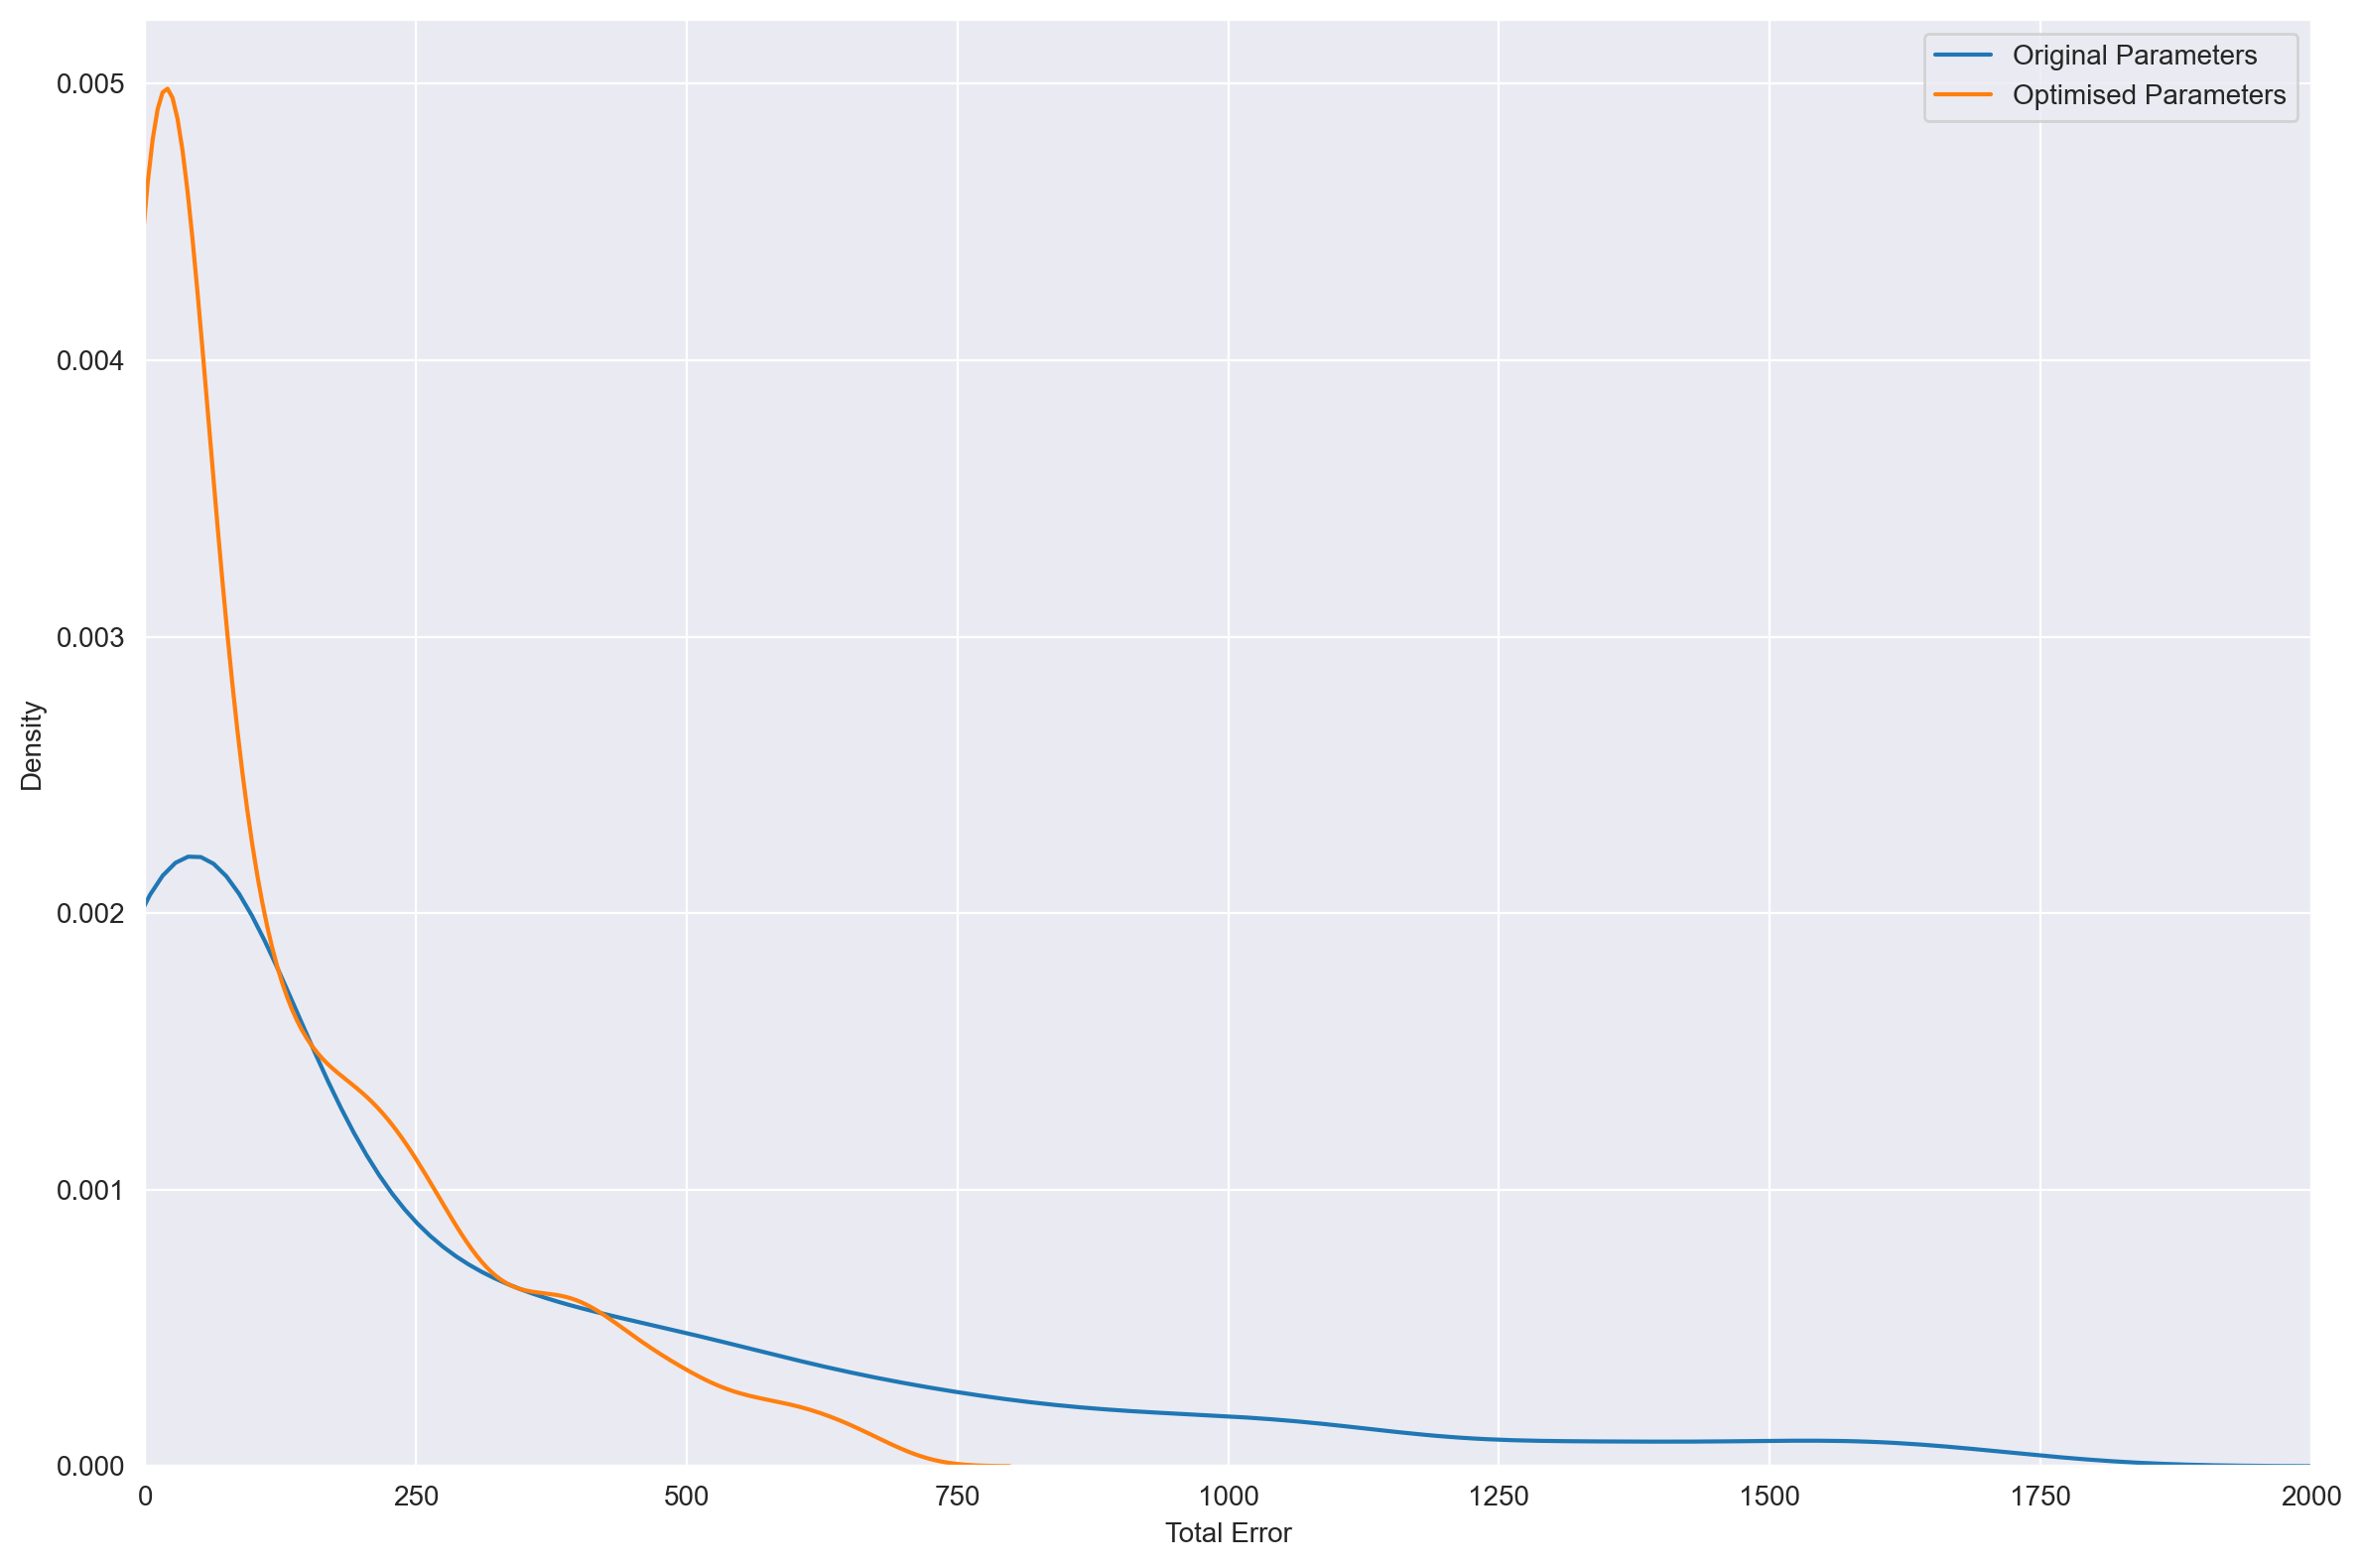

In [82]:
plt.figure(figsize=(12, 8), dpi=200, tight_layout=True)

sns.kdeplot(data=orig_wb, x='totalError')
ax = sns.kdeplot(data=wellbehaving, x='totalError')
ax.legend(['Original Parameters', 'Optimised Parameters'])

ax.set(xlabel='Total Error', xlim=(0, 2000))

plt.savefig('../styau/total-error-dist.png')

In [34]:
orig_wb.append(wellbehaving)

C:\Users\billi\AppData\Local\Temp\ipykernel_23228\3148949804.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orig_wb.append(wellbehaving)


,name,totalError,hf,refHf,ie,refIe,dipole,refDipole,geomError,hasGeom,hfError,ieError,dipoleError,optMethod
0,0-H1,1523.010021,326.674239,365.7,-0.000000,NaN,0.000000e+00,NaN,NaN,False,-39.025761,NaN,NaN,original
1,1-H1,0.000004,52.102000,52.1,11.906276,NaN,0.000000e+00,NaN,NaN,False,0.002000,NaN,NaN,original
2,2-H2,822.581718,0.718497,0.0,15.747221,15.4,7.074176e-16,NaN,40.249452,True,0.718497,0.347221,NaN,original
3,3-C1,1696.853124,389.407123,430.6,18.695558,NaN,0.000000e+00,NaN,NaN,False,-41.192877,NaN,NaN,original
4,4-C1,0.000100,170.890000,170.9,9.475558,NaN,0.000000e+00,NaN,NaN,False,-0.010000,NaN,NaN,original
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,1201-H6C7O4F6,65.434330,-452.410851,-460.5,12.374193,NaN,5.447756e+00,NaN,NaN,False,8.089149,NaN,NaN,rfo
1202,1202-C6F10,63.225862,-453.948531,-461.9,12.122782,NaN,6.670372e-01,NaN,NaN,False,7.951469,NaN,NaN,rfo
1203,1203-C5N1F11,120.530744,-467.921351,-478.9,13.362248,NaN,8.346285e-02,NaN,NaN,False,10.978649,NaN,NaN,rfo
1204,1204-C2N5F11,20.607974,-88.939601,-84.4,12.802659,NaN,2.108776e-01,NaN,NaN,False,-4.539601,NaN,NaN,rfo


In [7]:
dfs[3].totalError.describe().to_csv('after-opt.csv')

In [8]:
dfs[0].totalError.describe().apply(lambda x: format(x, 'f')).to_csv('before-opt.csv')

In [9]:
(dfs[3].totalError - dfs[0].totalError).describe().to_csv('before-vs-after.csv')

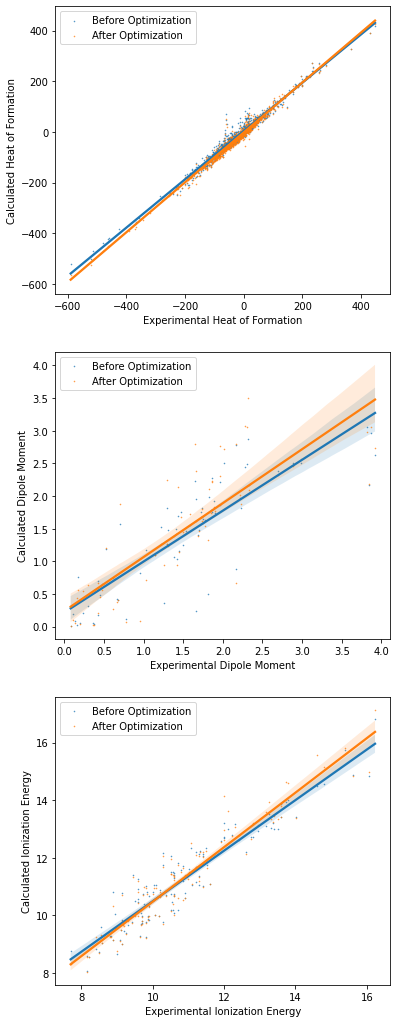

In [10]:
fig, axs = plt.subplots(nrows=3, figsize=(6, 18));
axs = axs.flatten()

betterNames = [('Experimental Heat of Formation', 'Calculated Heat of Formation'),
               ('Experimental Dipole Moment', 'Calculated Dipole Moment'),
               ('Experimental Ionization Energy', 'Calculated Ionization Energy')]
for i, t in enumerate([('refHf', 'hf'), ('refDipole', 'dipole'), ('refIe', 'ie')]):
    sns.regplot(data=dfs[0], x=t[0], y=t[1], ax=axs[i], scatter_kws={'s': 0.3}, label='Before Optimization')
    sns.regplot(data=dfs[3], x=t[0], y=t[1], ax=axs[i], scatter_kws={'s': 0.3}, label='After Optimization')
    axs[i].legend(loc='upper left')
    axs[i].set(xlabel=betterNames[i][0], ylabel=betterNames[i][1])

plt.savefig('scatter.png', dpi=600)

In [11]:
for et in errorTypes:
    print(et)
    dfs[3][et].describe().to_csv(et + '.csv')

hfError
ieError
dipoleError
geomError


In [12]:
a = []
with open('rfoerrors.csv', 'r') as qcsv:
    for line in qcsv:
        a.append(float(line))
a

[893292.7668360209,
 828165.2274270573,
 828885.1492868514,
 828701.0617478875,
 828825.3337120045,
 828638.2709677772,
 828570.5122107953,
 828778.5039791685,
 733450.701807035,
 726186.4071006813,
 726634.3597201426,
 727669.2097244811,
 728233.0905800306,
 724220.9640878314,
 725449.4089149148,
 726068.8294273162,
 725837.0991036689,
 722569.5531243193,
 723706.2835147105,
 724316.4175571552,
 724323.0074294391,
 724155.6252495296,
 724416.7992082342,
 718284.6779153234,
 720155.8712344862,
 720163.690198611,
 720846.2002955292,
 718009.7817540334,
 717688.6219474126,
 719151.8189528005,
 713598.9784957623,
 715931.2987219078,
 716676.7549133045,
 710557.6667427231,
 712542.740656287,
 712248.977309476,
 712267.6894149836,
 712283.5573227375,
 712836.2097412747,
 712837.9632877698,
 708410.6490226048,
 709936.4609901562,
 709938.1257504886,
 709936.3899524836,
 709933.6892886446,
 709932.1163590953,
 709929.1812987794,
 709953.0630690246,
 709950.7730305997,
 709948.7831165363,
 709

In [13]:
qa = []
with open('qaerrors.csv', 'r') as qcsv:
    for line in qcsv:
        qa.append(float(line))
qa

[893327.7687054755,
 832534.7261484957,
 800163.8657484248,
 752793.3824622852,
 751620.4795216857,
 750939.4474603945,
 748874.5395759623,
 745914.8706868549,
 747514.3637278226,
 745955.1260992291,
 743217.5347412936,
 740795.4944511531,
 742536.3805061273,
 739388.4162102961,
 740499.8077820943,
 734062.9089476609,
 732426.1251588828,
 734525.2001968871,
 731179.5598532818,
 733276.6487709482,
 730112.6967661938,
 732265.8426289052,
 728988.7179449887,
 730691.0152592257,
 725109.6804285294,
 725720.473688757,
 720789.6713213554,
 723126.9564449169,
 719879.1256195607,
 721950.2705518478,
 720005.315862109,
 720205.140057022,
 718238.3048773808,
 719645.6861946181,
 718009.8270625215,
 719315.8342311262,
 717785.00253008,
 718901.8371364822,
 716794.2994889866,
 718051.9968852787,
 715207.461585762,
 716511.7741818054,
 713014.3050866702,
 713735.5583686297,
 710858.2245815132,
 712472.8638693274,
 711754.15089881,
 711893.0683461649,
 710770.90271845,
 711671.3978087599,
 710901.38

In [14]:
ga = []
with open('gradienterrors.csv', 'r') as qcsv:
    for line in qcsv:
        ga.append(float(line))
ga

[891813.0328689626,
 847243.7253314975,
 837684.799883415,
 834642.6030310484,
 832570.0373541152,
 831183.5038718892,
 829578.9282163866,
 828625.2633978646,
 827218.3560954271,
 826468.495134925,
 825197.3759394542,
 824571.0790446337,
 823400.3785202958,
 822855.2842222829,
 821763.80370419,
 821286.2686668634,
 820336.0248237919,
 819917.6750673961,
 819014.9623804962,
 818623.5719364235,
 817760.7471729822,
 817391.0143169888,
 816567.8438909518,
 816215.7856695497,
 815426.459520277,
 815089.4793092132,
 814330.9583390809,
 814007.0607130236,
 813276.698837575,
 812964.1870891094,
 812260.5560274309,
 811958.6376683492,
 811280.2362372555,
 810987.9951629014,
 810332.8958428191,
 810049.493261797,
 809416.5424805809,
 809141.4340678033,
 808528.8230439686,
 808261.4610390062,
 807668.172013378,
 807408.0127563137,
 806833.0549198122,
 806579.6878047356,
 806022.3873776452,
 805775.6536053655,
 805234.9772588,
 804994.3598878126,
 804469.8250332616,
 804235.266776439,
 803724.9353

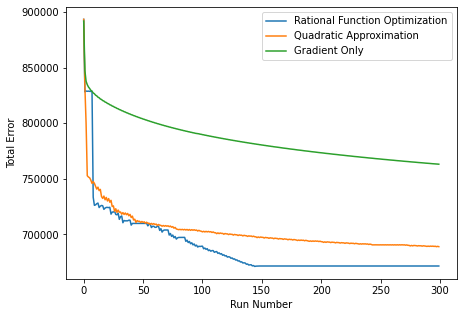

In [21]:
plt.figure(figsize=(7, 5))
ax = sns.lineplot(y=a, x=[i for i in range(300)])
sns.lineplot(y=qa, x=[i for i in range(300)], ax=ax)
sns.lineplot(y=ga, x=[i for i in range(300)], ax=ax)
ax.legend(['Rational Function Optimization', 'Quadratic Approximation', 'Gradient Only'])
ax.set_xlabel('Run Number')
ax.set_ylabel('Total Error')

plt.savefig('rforunnum.png', dpi=300)